# Calculate the Year to Date Price Trends for 10-year Treasury Notes

## Background
Treasury notes, also known as T-notes, are financial instruments that offer a fixed interest rate every six months until they mature. These instruments are available for 2, 3, 5, 7, and 10 years and can be priced above or below their face (par) value. Upon maturity, lenders are entitled to the full par value of the note. T-notes are considered coupon debt instruments, meaning lenders receive regular interest payments based on a coupon rate throughout the note’s lifespan. 

### Pricing
Let the term of a note be T-years with $\lambda$ coupon payments per year; $N = \lambda{T}$ coupon payments over the bond term. Further, let $\bar{c}$ denote the annualized coupon rate, and $\bar{r}$ denote the annual effective market rate of interest. Then, the _fair price_ for note $V_{B}$ is the present value of coupon payments $C$ plus the discounted face (par) value $V_{P}$ of the bond:

$$
V_{B} = \mathcal{D}^{-1}_{N}V_{P}+\sum_{j=1}^{N}\mathcal{D}_{j}^{-1}C
$$

where $\mathcal{D}_{i}$ denotes the discount factor for time period $0\rightarrow{i}$ which can be either a discrete or continuous compouning model. The coupon payment $C=\left(\bar{c}/\lambda\right)\cdot{V_{P}}$ is set when the bond is purchased, and the interest rate $i=\bar{r}/\lambda$ varies with the market (set at auction). The contract between the U.S. government, the issuer, and the note holder (you) includes the note’s coupon rate, maturity date, and face (par) value.

## Learning objective
Using historical `TMUBMUSD10Y` quotation data, compute the price trend for a 10-year T-Note with a coupon rate of 3.375%. We'll load the historical dataset, which contains daily Year-to-Date (YTD) Open, High, Low, and Close yield values from `01/03/23` to `06/01/23` for 10-year T-notes. You'll compute the price trend from this historical data.

### Tasks
1. Compute the T-Note price series for historical daily yield values. Store the computed T-Note price values in an array. Each row of the array holds data for a particular date, where each column corresponds to computed price values calculated for the yield at the close of the market using discrete and continuous compounding. 

## Setup
In the following code blocks, we set up the computational environment by including the `Include.jl` file. The `Include.jl` file loads external packages, functions that we will use in this exercise, and custom types to model the components of our problem.

In [1]:
include("Include.jl");

## Load historical data

In [2]:
path_to_data_file = joinpath(_PATH_TO_DATA,"TMUBMUSD10Y-d-01-03-23-to-06-01-23.csv");
dataset = loaddatafile(path_to_data_file);

## Compute historical T-Note price series

In [3]:
number_of_days = nrow(dataset)
price_array = Array{Float64,2}(undef, number_of_days, 3);

# Set constants that are the same for each T-Note
T = 10.0;
λ = 2
c = 0.03375
Vₚ = 100.0

# main loop -
for i ∈ 1:number_of_days
   
    # yeild for date i -
    r̄ᵢ = dataset[i,:Close]*(1/100);
    
    # model continuous compounding -
    continuous_model = build(MyUSTreasuryCouponSecurityModel, (
        par = Vₚ, T = T, λ = λ, rate = r̄ᵢ, coupon = c
        )) |> (x->price(x, ContinuousCompoundingModel(), Vₚ = Vₚ))
    
    # model discrete compounding -
    discrete_model = build(MyUSTreasuryCouponSecurityModel, (
        par = Vₚ, T = T, λ = λ, rate = r̄ᵢ, coupon = c
        )) |> (x->price(x, DiscreteCompoundingModel(), Vₚ = Vₚ))
    
    # store result -
    price_array[i,1] = r̄ᵢ
    price_array[i,2] = continuous_model.price
    price_array[i,3] = discrete_model.price
end

## Visualize the 10-year T-note price series

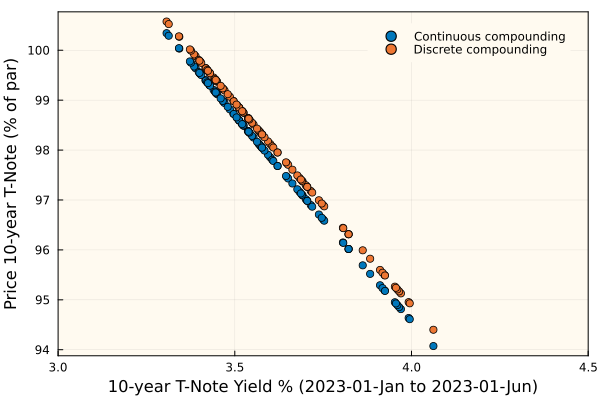

In [14]:
scatter(100*price_array[:,1],price_array[:,2], c=colors[2], label="Continuous compounding", xlim=(3.0,4.5),
    bg="floralwhite", background_color_outside="white", framestyle = :box, fg_legend = :transparent)
scatter!(100*price_array[:,1],price_array[:,3],c=colors[1], label="Discrete compounding")
xlabel!("10-year T-Note Yield % (2023-01-Jan to 2023-01-Jun)", fontsize=18)
ylabel!("Price 10-year T-Note (% of par)", fontsize=18)